# <center>Plots y visualización de los datos</center> #

In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt #para realizar multiples plot o polplots o multiples paneles dentro de la misma imagen
#con el paquete pyplot llamamos al metodo subplots
import numpy as np #importamos porque también posee metodos matemáticos como la aplicación de logaritmos

In [3]:
mainpath = os.path.join(os.getcwd(), "python-ml-course-master/datasets")
filename = "customer-churn-model/Customer Churn Model.txt"

In [4]:
data = pd.read_csv(os.path.join(mainpath, filename))

In [6]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


##### Opciones de plot al trabajar con un notebook #####

Realiza el plot o varios plots dentro de la misma celda

In [14]:
%matplotlib inline

Guardar un plot en el directorio local

In [15]:
#savefig ("path_donde_guardar_im.jpeg")

### Scatter Plot ###
Nube de dispersión o nube de puntos
<br>
Nos sirve para mostrar correlaciones entre dos variables

kind = Tipo de representación gráfica

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

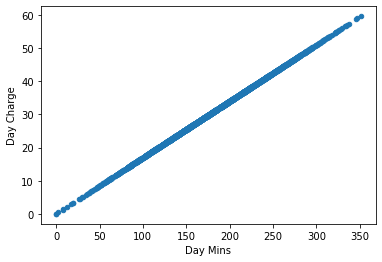

In [16]:
data.plot(kind="scatter", x="Day Mins", y="Day Charge")

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

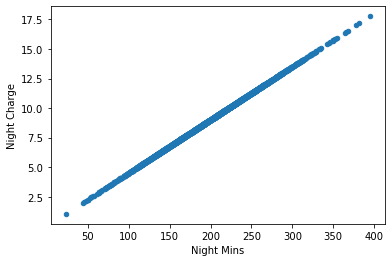

In [17]:
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

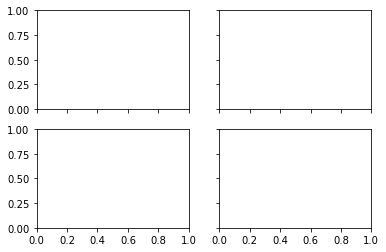

In [23]:
#figure, variable para crear el dibujo
#axs, variable para hacer los ejes
#2,2 = matriz de 2x2
#sharey = las matrices compartiran el mismo eje Y
#sharex = las matrices compartiran el mismo eje X

figure, axs = plt.subplots (2,2, sharey=True, sharex=True)

In [25]:
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax = axs[0][0])

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

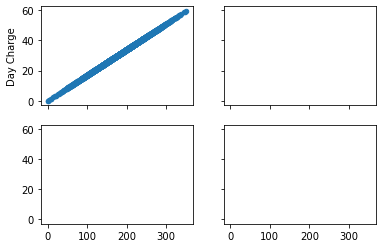

In [27]:
#Debido al comando "%matplotlib inline", los gráficos deben ser ejecutados en la misma celda

figure, axs = plt.subplots (2,2, sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax = axs[0][0])

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

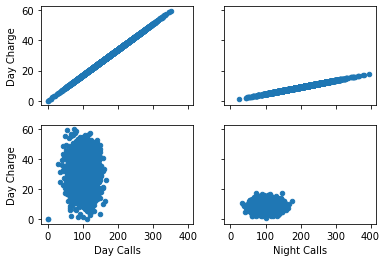

In [29]:
figure, axs = plt.subplots (2,2, sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax = axs[0][0])
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax = axs[0][1])
data.plot(kind="scatter", x="Day Calls", y="Day Charge", ax = axs[1][0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax = axs[1][1])

### Histogramas de frecuencias ###
Comunmente llamado gráfico de los tontos ya que no hace falta tener muchos conocimientos para poder ser interpretado

El histograma es un gran modo de ver como se distrubuye una información numérica, una variable numérica
<br>
De golpe obtenemos una visión de los rangos o los grupos

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

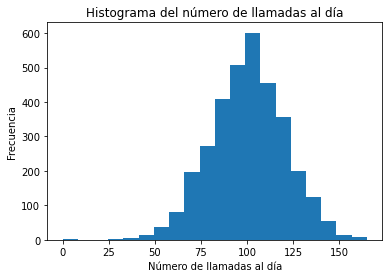

In [52]:
#bins, controla el número de divisiones
plt.hist(data["Day Calls"], bins=20)

plt.xlabel("Número de llamadas al día") #Etiqueta en el eje X
plt.ylabel("Frecuencia") #Etiqueta en el eje Y
plt.title("Histograma del número de llamadas al día") #Título del gráfico

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

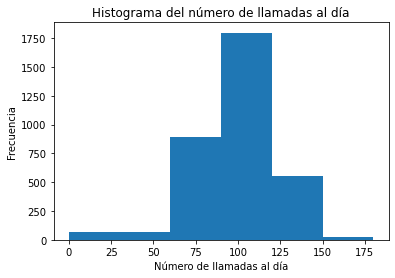

In [53]:
#bins, También le podemos pasar un número de divisiones fijas o una lista de divisiones
plt.hist(data["Day Calls"], bins=[0, 60, 90, 120, 150, 180])

plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del número de llamadas al día")

##### Regla de Sturges #####
Establece la regla para saber cuantas divisiones debe llevar un histograma
<br>
<ul>
<li><b>struger = log2 (M)</b></li>
</ul>
log2 = logaritmo base 2
<br>
M = Tamaño de la muestra (número total de filas del Data set)

In [44]:
np.log2(2)

1.0

In [48]:
#ceil(), redondea hacia arriba
#Tamaño de la muestra del dataset = 3333

np.ceil(1 + np.log2(3333))

13.0

In [49]:
#bins recibe valores tipo enteros y no flotantes

int(np.ceil(1 + np.log2(3333)))

13

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

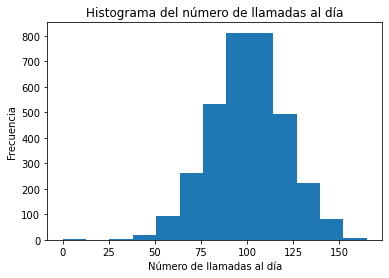

In [54]:
k = int(np.ceil(1 + np.log2(3333)))

plt.hist(data["Day Calls"], bins= k)

plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del número de llamadas al día")

### Boxplot, diagrama de caja y bigotes ###
Ayuda a entender la distrubución de una variable numérica
<br>
La caja indica donde se encuentran los valores centrales, cuantiles 25, 50 y 75 porciento

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

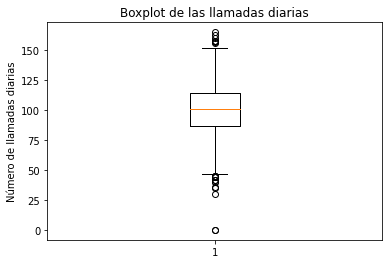

In [56]:
plt.boxplot(data["Day Calls"])

plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")

Valores aoutlayer (valor fuera de lugar) son representados con bolitas

In [57]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [1]:
#Rango intercuartilico
#Inter Quartil Range
#Sirve para saber las dimensiones de la caja, tamaño
IQR=114-87
IQR

27

In [76]:
IQR = data["Day Calls"].quantile(0.75) - data["Day Calls"].quantile(0.25)
IQR

27.0

In [77]:
#Muestra el lugar donde empieza y donde acaba el bigote de la caja

#bigote inferior, se toma el primer cuantil y se resta 1.5 veces el rango intercuantilico
data["Day Calls"].quantile(0.25) - 1.5*IQR

46.5

In [78]:
#bigote superior, se toma el tercer cuantil y se le suma 1.5 veces el rango intercuantilico
data["Day Calls"].quantile(0.75) + 1.5*IQR

154.5